# Question 1


In [1]:
import pandas as pd

#  Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')


In [5]:

mean_age = users.groupby('occupation')['age'].mean()
print("mean age per occupation \n",mean_age)
male_ratio = (users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()).sort_values(ascending=False)
print("Male ratio per occupation \n",male_ratio)
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])
print("MIN and MAX age for each occupation")
print(min_max_age)
mean_age_by_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("Mean age by sex and occupation")
print(mean_age_by_sex)
gender_percentage = (users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size() * 100)
print("Gender on each occupation \n", gender_percentage)

mean age per occupation 
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
Male ratio per occupation 
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.

#Question 2

In [ ]:
import pandas as pd
# Import dataset and libraries
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)
goals = euro12['Goals']
teams = len(euro12['Team'].unique())
print("Number of teams participate in Euro12: ",teams)
columns = euro12.shape[1]
print("Number of columns in the dataset",columns)


Number of teams participate in Euro12:  16
Number of columns in the dataset 35


In [9]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'])
print("sorted teams by red and yellow card")
print(discipline_sorted.head())
mean_yellow = euro12['Yellow Cards'].mean()


sorted teams by red and yellow card
           Team  Yellow Cards  Red Cards
2       Denmark             4          0
5       Germany             4          0
3       England             5          0
8   Netherlands             5          0
15      Ukraine             5          0


In [10]:
teams_6_goals = euro12[euro12['Goals'] > 6]['Team']
print("Teams with more than 6 goals\n",teams_6_goals)
teams_start_g = euro12[euro12['Team'].str.startswith('G')]
print("Teams starting with G\n",teams_start_g)
first_7 = euro12.iloc[:, :7]
exclude_last_3 = euro12.iloc[:, :-3]
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]['Shooting Accuracy']
print("Shooting Accuracy from England, Italy and Russia\n",shooting_accuracy)

Teams with more than 6 goals
 5     Germany
13      Spain
Name: Team, dtype: object
Teams starting with G
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1 

#Question 3

In [ ]:
import numpy as np
import pandas as pd
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30000, 100))

df = pd.concat([series1, series2, series3], axis=1)
print("DataFrame Created\n",df.head())
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("DataFrame updated with columns \n",df.head())
bigcolumn = pd.concat([series1, series2, series3]).reset_index(drop=True)
print("DataFrame with the values of the 3 Series \n",bigcolumn)
reindexed_df = bigcolumn.reindex(range(300))
print("reindexed DataFrame \n",reindexed_df)

DataFrame Created
    0  1      2
0  2  3  19917
1  1  2  25929
2  3  1  16928
3  1  2  17795
4  1  2  22017
DataFrame updated with columns 
    bedrs  bathrs  price_sqr_meter
0      2       3            19917
1      1       2            25929
2      3       1            16928
3      1       2            17795
4      1       2            22017
DataFrame with the values of the 3 Series 
 0          2
1          1
2          3
3          1
4          1
       ...  
295    20360
296    24953
297    19704
298    20985
299    26241
Length: 300, dtype: int64
reindexed DataFrame 
 0          2
1          1
2          3
3          1
4          1
       ...  
295    20360
296    24953
297    19704
298    20985
299    26241
Length: 300, dtype: int64


#Question 4

In [17]:
import pandas as pd
import numpy as np

# Importing the dataset
file_path = 'wind.txt'
data = pd.read_csv(file_path, delim_whitespace=True)

# Replacing the first 3 columns by a proper datetime index
data['Yr'] = data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)
data.rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}, inplace=True)

data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])
#Set the dates as the index
data.set_index('Date', inplace=True)
data.drop(columns=['year', 'month', 'day'], inplace=True)

print(data.head())



              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  


<ipython-input-17-f1dab18bbf52>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


In [18]:
# Fixing year 2061 issue
def fix_year(year):
    return year - 100 if year > 2000 else year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))
print(data.index.year.unique())

Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978],
      dtype='int32', name='Date')


In [19]:
# Compute how many values are missing for each location over the entire record
missing_values = data.isnull().sum()
print("Missing values per location:\n", missing_values)


Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [20]:

# Compute how many non-missing values there are in total
non_missing_values = data.notnull().sum().sum()
print("Total non-missing values:", non_missing_values)


Total non-missing values: 78857


In [21]:

# Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()
print("Mean windspeed (overall):", mean_windspeed)


Mean windspeed (overall): 10.227982360836938


In [22]:

# Create a DataFrame called loc_stats and calculate the min, max, mean, and std for each location
loc_stats = data.agg(['min', 'max', 'mean', 'std']).T
print("Location statistics:\n", loc_stats)

# Create a DataFrame called day_stats and calculate the min, max, mean, and std for each day
day_stats = data.T.agg(['min', 'max', 'mean', 'std']).T
print("Daily statistics:\n", day_stats)


Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794
Daily statistics:
              min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.7

In [26]:

# Find the average windspeed in January for each location
january_data = data[data.index.month == 1]
january_avg = january_data.groupby(january_data.index.year).mean()
print("Average January windspeed per location:\n", january_avg.head())

# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('YE').mean()
print("\n\nYearly data:\n", yearly_data.head())

# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()
print("\n\nMonthly data:\n", monthly_data.head())

# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()
print("\n\nWeekly data:\n", weekly_data.head())

# Calculate the min, max, mean, and std of the windspeeds across all locations for each week (first 52 weeks)
weekly_stats = weekly_data.head(52).agg(['min', 'max', 'mean', 'std'])
print("\n\nWeekly statistics for the first 52 weeks:\n", weekly_stats.head())

Average January windspeed per location:
             RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                   
1961  14.841333  11.988333  13.431613  7.736774  11.072759  8.588065   
1962  14.783871  13.160323  12.591935  7.538065  11.779677  8.720000   
1963  14.868387  11.112903  15.121613  6.635806  11.080645  7.835484   
1964  12.661290  11.818387  11.741290  6.953548  11.400645  6.865806   
1965  15.741613  15.546774  15.274194  8.258387  13.588065  9.251290   

            DUB        CLA       MUL        CLO        BEL        MAL  
Date                                                                   
1961  11.184839   9.245333  9.085806  10.107419  13.880968  14.703226  
1962  14.211935   9.600000  9.670000  11.498710  16.369355  15.661613  
1963  12.797419   9.844839  7.841613   9.390000  11.428710  18.822258  
1964   9.592903   9.687419  6.947742   9.676774  15.067419  14.145484  
1965  13.850968  11.26

<ipython-input-26-5b2724914173>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


#Question 5

In [ ]:
import pandas as pd
import numpy as np
# Import the necessary libraries

# Import the dataset from the provided URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

#See the first 10 entries
print(chipo.head(10))

# What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [28]:

# What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

# Print the name of all the columns
print("Columns in the dataset:", chipo.columns.tolist())

# How is the dataset indexed?
print("Index of the dataset:", chipo.index)

# Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False).head(1)
print("Most ordered item:\n", most_ordered_item)

# For the most-ordered item, how many items were ordered?
most_ordered_quantity = most_ordered_item['quantity'].values[0]
print("Quantity of most ordered item:", most_ordered_quantity)

# What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most ordered choice description:", most_ordered_choice)

# How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)


Number of columns: 5
Columns in the dataset: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']
Index of the dataset: RangeIndex(start=0, stop=4622, step=1)
Most ordered item:
               order_id  quantity  \
item_name                          
Chicken Bowl    713926       761   

                                             choice_description  \
item_name                                                         
Chicken Bowl  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...   

                                                     item_price  
item_name                                                        
Chicken Bowl  $16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...  
Quantity of most ordered item: 761
Most ordered choice description: [Diet Coke]
Total items ordered: 4972


In [29]:

# Turn the item price into a float
# Remove the dollar sign and convert to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print("Updated item_price type:", chipo['item_price'].dtype)

# How much was the revenue for the period in the dataset?
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", total_revenue)

# How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print("Total orders:", total_orders)

# What is the average revenue amount per order?
average_revenue_per_order = total_revenue / total_orders
print("Average revenue per order:", average_revenue_per_order)

# How many different items are sold?
different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", different_items_sold)

Updated item_price type: float64
Total revenue: 39237.02
Total orders: 1834
Average revenue per order: 21.39423118865867
Number of different items sold: 50


#Question 6


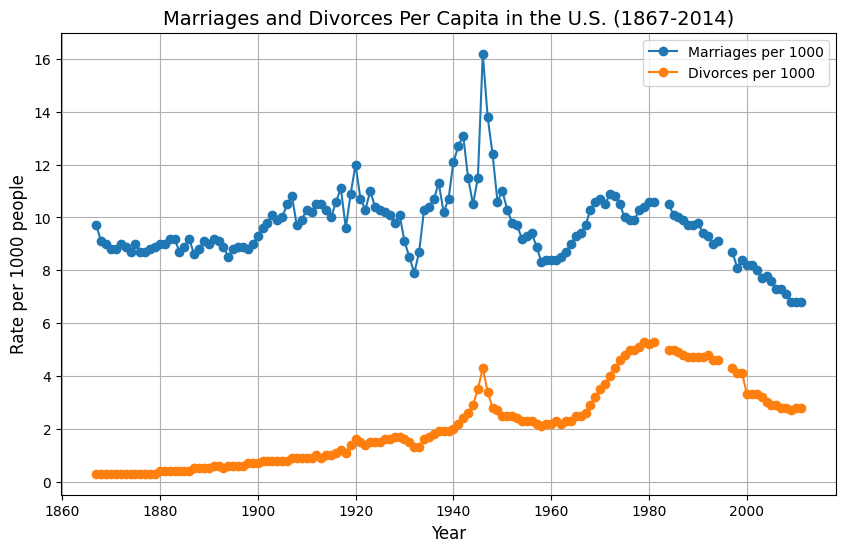

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Line Plot for Marriages and Divorces Per Capita
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', marker='o')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', marker='o')
plt.title('Marriages and Divorces Per Capita in the U.S. (1867-2014)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 1000 people', fontsize=12)
plt.legend()
plt.grid()
plt.show()

#Question 7

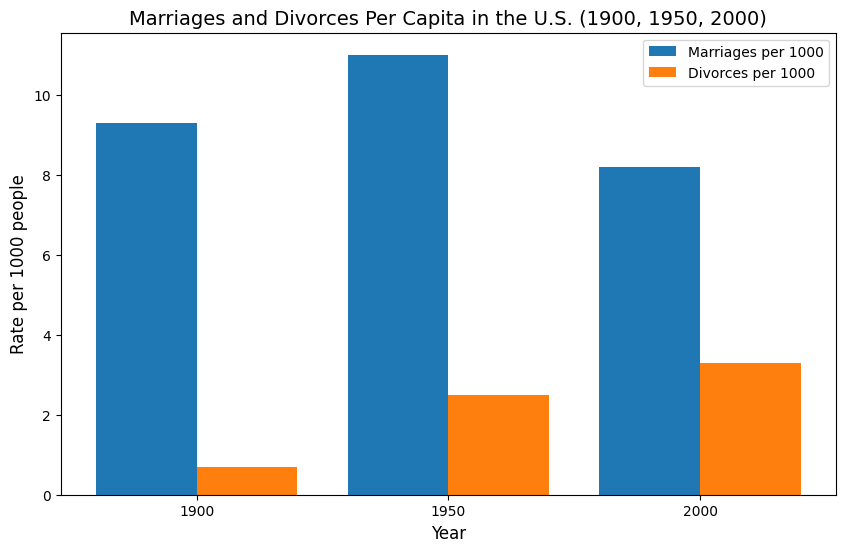

In [ ]:
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(years))
plt.bar(x, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', align='center')
plt.bar([p + bar_width for p in x], filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', align='center')
plt.xticks([p + bar_width/2 for p in x], years)
plt.title('Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 1000 people', fontsize=12)
plt.legend()
plt.show()


#Question 8

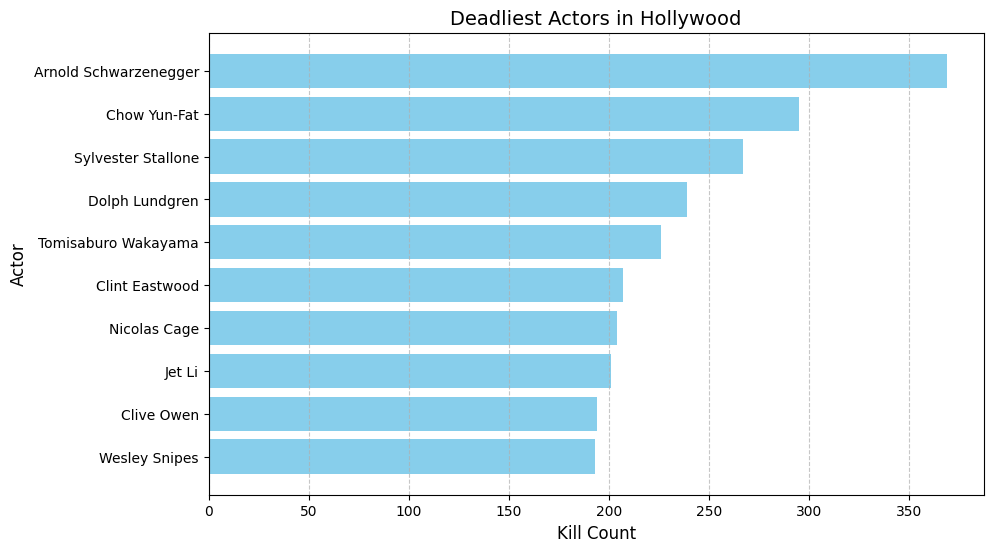

In [ ]:
file_path = 'actor_kill_counts.csv'
actor_data = pd.read_csv(file_path)

# Sort data by kill count
actor_data.sort_values(by='Count', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(actor_data['Actor'], actor_data['Count'], color='skyblue')
plt.title('Deadliest Actors in Hollywood', fontsize=14)
plt.xlabel('Kill Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#Question 9


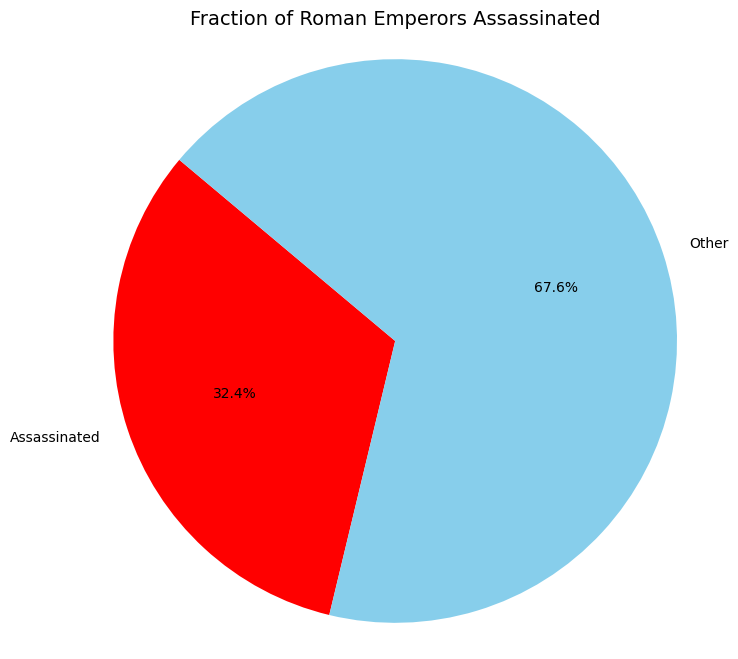

In [ ]:
file_path = 'roman-emperor-reigns.csv'
emperor_data = pd.read_csv(file_path)

# Calculate fractions
counts = emperor_data['Cause_of_Death'].value_counts()
assassinated_fraction = counts.get('Assassinated', 0)
total_emperors = counts.sum()

plt.figure(figsize=(8, 8))
labels = ['Assassinated', 'Other']
sizes = [assassinated_fraction, total_emperors - assassinated_fraction]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'skyblue'])
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

#Question 10

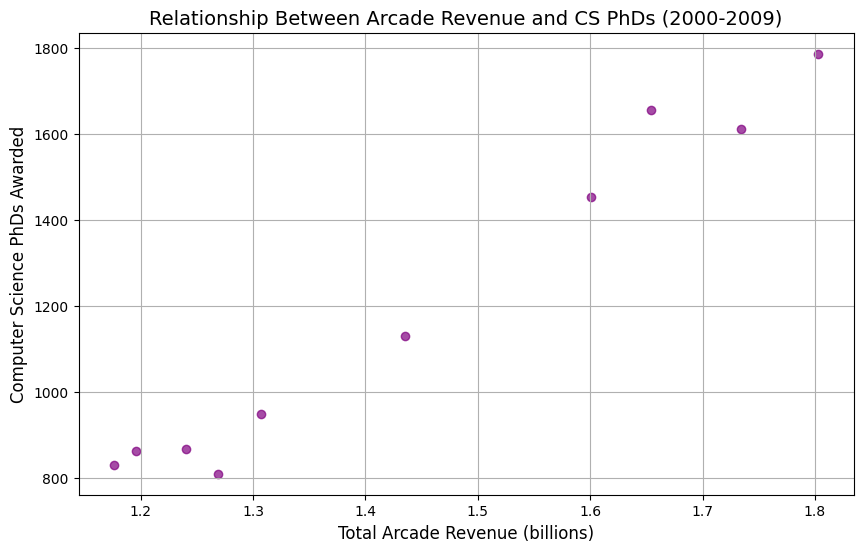

In [ ]:
file_path = 'arcade-revenue-vs-cs-doctorates.csv'
arcade_data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.scatter(arcade_data['Total Arcade Revenue (billions)'], arcade_data['Computer Science Doctorates Awarded (US)'], color='purple', alpha=0.7)
plt.title('Relationship Between Arcade Revenue and CS PhDs (2000-2009)', fontsize=14)
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science PhDs Awarded', fontsize=12)
plt.grid()
plt.show()